# Guided Project: Predicting Heart Disease with KNeighborsClassifier
*The aim of this project is to build a supervised Machine Learning model to predict which health attributes predict a heart dicease in the future. <br>*The dataset used is anonymized patient data from multiple hospitals and several patients.

#### Data dictionary

**Age:** age of the patient [years]<br>
**Sex:** sex of the patient [M: Male, F: Female]<br>
**ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
**RestingBP:** resting blood pressure [mm Hg]<br>
**Cholesterol:** serum cholesterol [mm/dl]<br>
**FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
**RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
**MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]<br>
**ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]<br>
**Oldpeak:** oldpeak = ST [Numeric value measured in depression]<br>
**ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
**HeartDisease:** output class [1: heart disease, 0: Normal]<br>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df=pd.read_csv('heart_disease_prediction.csv')
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Observations:
* From the dataset statistics we can see the average age of the patients is 53.5 years. Where the youngest patient is 28 years old and the oldest patient is 77 years old.
* We can see in the RestingBP variable the minimum value is 0, which indicates an issue with the data. Respectively the maximum value is 200, which is very high and possibly is from a patient with severe heart disease condition.
* Equally Cholesterol minimum value is 0, which doesn't seem correct.

### Exploring the Dataset variable distributions

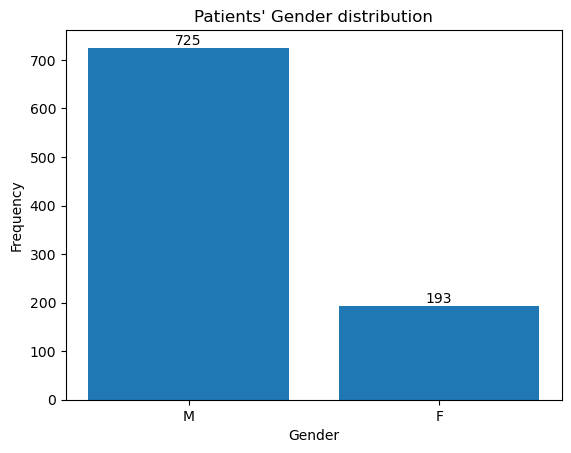

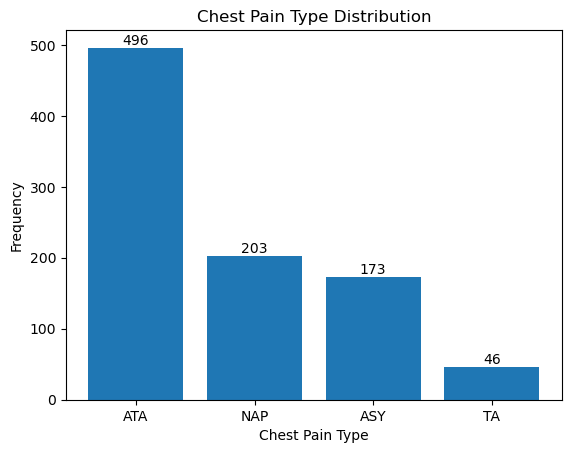

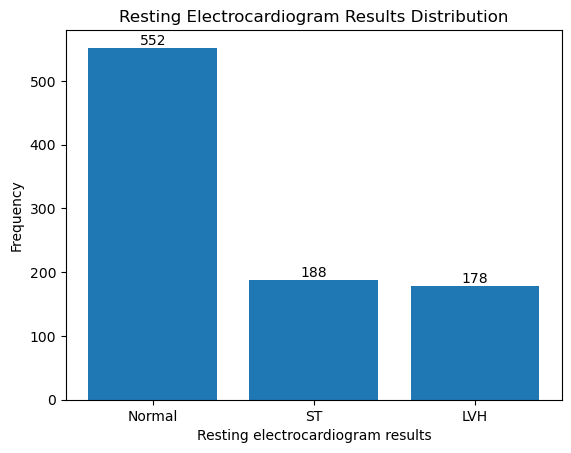

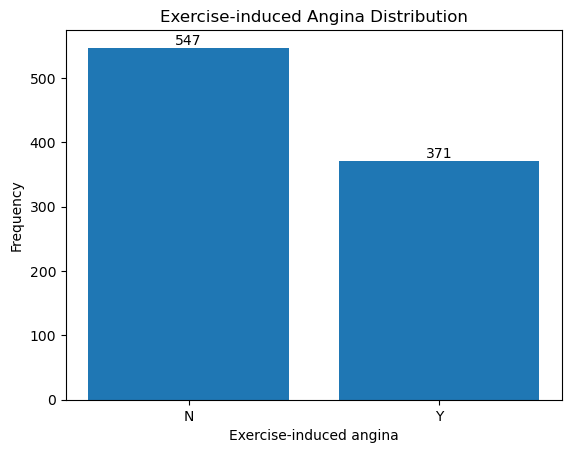

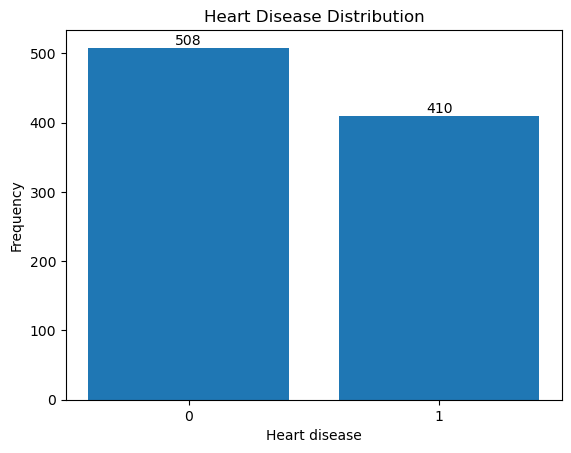

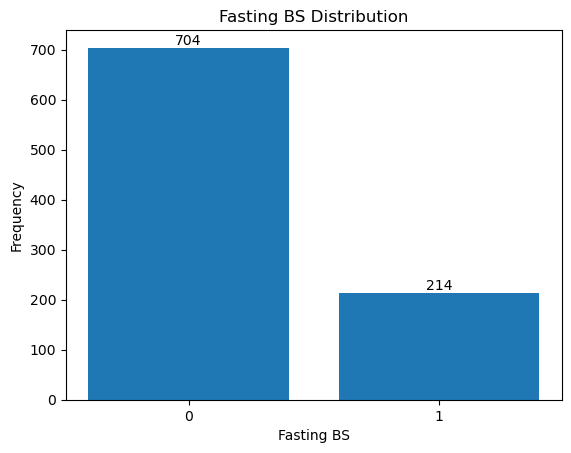

In [6]:
#Creating x & y variables for bar charts
x_sex=df['Sex'].unique()
height_sex=df['Sex'].value_counts()

x_cpt=df['ChestPainType'].unique()
height_cpt=df['ChestPainType'].value_counts()

x_ecg=df['RestingECG'].unique()
height_ecg=df['RestingECG'].value_counts()

x_ang=df['ExerciseAngina'].unique()
height_ang=df['ExerciseAngina'].value_counts()

df['HeartDisease_copy']=df['HeartDisease'].astype(str)
x_ht=df['HeartDisease_copy'].unique()
height_ht=df['HeartDisease_copy'].value_counts()

df['FastingBS_copy']=df['FastingBS'].astype(str)
x_fbs=df['FastingBS_copy'].unique()
height_fbs=df['FastingBS_copy'].value_counts()


###Creating bar charts
fig,ax=plt.subplots()
bar_container_sex = plt.bar(x_sex,height_sex)
ax.set(xlabel='Gender',ylabel='Frequency', title='Patients\' Gender distribution')
ax.bar_label(bar_container_sex)
plt.show()

fig,ax=plt.subplots()
bar_container_cpt = plt.bar(x_cpt,height_cpt)
ax.set(xlabel='Chest Pain Type',ylabel='Frequency', title='Chest Pain Type Distribution')
ax.bar_label(bar_container_cpt)
plt.show()

fig,ax=plt.subplots()
bar_container_ecg = plt.bar(x_ecg,height_ecg)
ax.set(xlabel='Resting electrocardiogram results',ylabel='Frequency', title='Resting Electrocardiogram Results Distribution')
ax.bar_label(bar_container_ecg)
plt.show()

fig,ax=plt.subplots()
bar_container_ang = plt.bar(x_ang,height_ang)
ax.set(xlabel='Exercise-induced angina',ylabel='Frequency', title='Exercise-induced Angina Distribution')
ax.bar_label(bar_container_ang)
plt.show()

fig,ax=plt.subplots()
bar_container_ht = plt.bar(x_ht,height_ht)
ax.set(xlabel='Heart disease',ylabel='Frequency', title='Heart Disease Distribution')
ax.bar_label(bar_container_ht)
plt.show()

fig,ax=plt.subplots()
bar_container_fbs = plt.bar(x_fbs,height_fbs)
ax.set(xlabel='Fasting BS',ylabel='Frequency', title='Fasting BS Distribution')
ax.bar_label(bar_container_fbs)
plt.show()

#### Observations
*The dataset has majority of Male patients (725) vs. Female (193), which could have an impact on the machine learning model prediction. <br> *The most common chest pain type among the patients was 'Atypical Angina'. <br> *The distribution of existing heart condition is nearly equal in the dataset.

#### Grouping categorical variables by Heart Disease condition

In [13]:
#Sex
df_test_g=df.groupby(['Sex'])['HeartDisease'].value_counts()
x_value=df_test_g[[2,1]]# heart disease yes
y_value=df_test_g[[3,0]] # heart disease no
x_location=df['Sex'].unique()
#ChestPainType
df_cpt=df.groupby(['ChestPainType'])['HeartDisease'].value_counts()
cpt_labels=['ASY','ATA','NAP','TA']
cpt_y=df_cpt[[0,3,5,7]]
cpt_n=df_cpt[[1,2,3,6]]
#resting ECG
df_ecg=df.groupby(['RestingECG'])['HeartDisease'].value_counts()
ecg_labels=['LVH','Normal','ST']
ecg_y=df_cpt[[0,2,4]]
ecg_n=df_cpt[[1,3,4]]

# #'ExerciseAngina
df_ang=df.groupby(['ExerciseAngina'])['HeartDisease'].value_counts()
ang_labels=['No','Yes']
ang_y=df_ang[[1,2]]
ang_n=df_ang[[0,3]]
#FastingBS
df_fbs=df.groupby(['FastingBS'])['HeartDisease'].value_counts()
fbs_labels=['No','Yes']
fbs_y=[df_fbs[0][1],df_fbs[1][0]]
fbs_n=[df_fbs[0][0],df_fbs[1][1]]
#print(df_fbs)

*Creating bar charts for grouped data

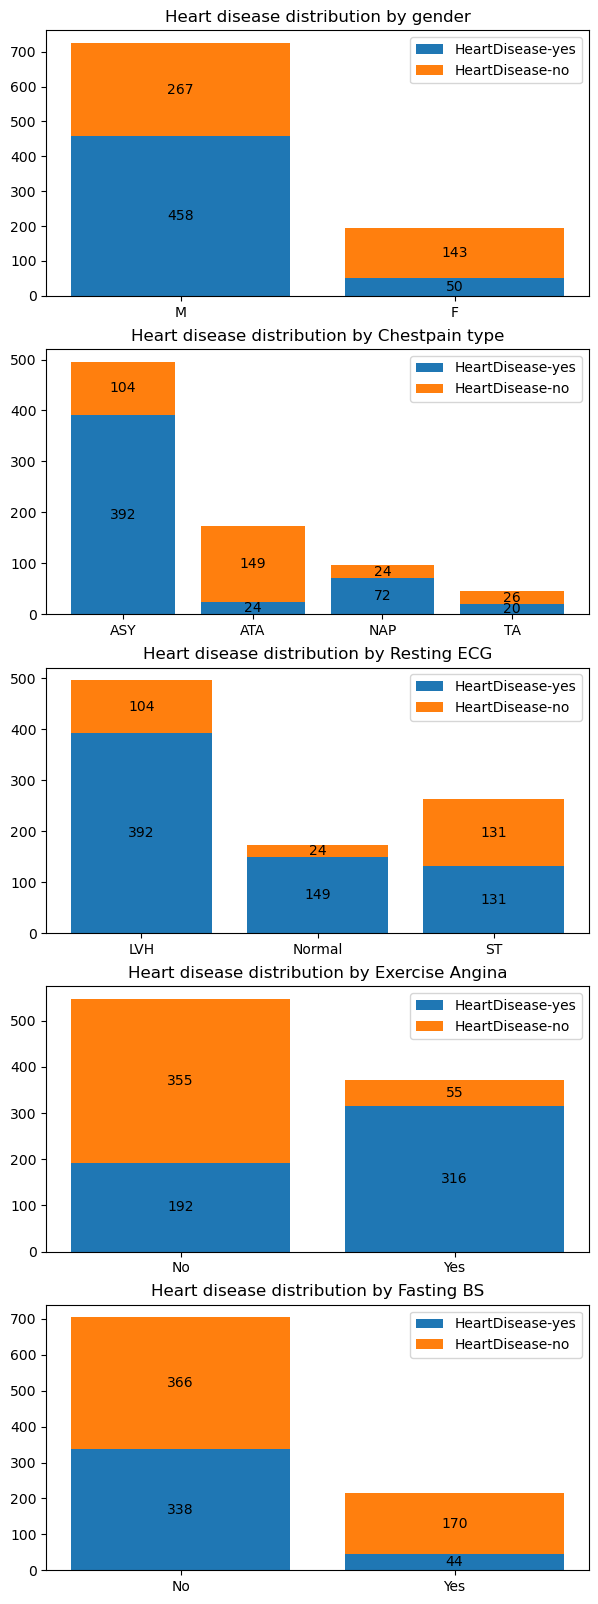

In [9]:
fig, ax = plt.subplots(nrows=5,ncols=1,figsize=(7,20))
x_bar=ax[0].bar(x_location,x_value,label='HeartDisease-yes')
y_bar=ax[0].bar(x_location,y_value,bottom=x_value,label='HeartDisease-no')
ax[0].legend()
ax[0].bar_label(x_bar,label_type='center')
ax[0].bar_label(y_bar,label_type='center')
ax[0].set_title(label='Heart disease distribution by gender')

x_bar=ax[1].bar(cpt_labels,cpt_y,label='HeartDisease-yes')
y_bar=ax[1].bar(cpt_labels,cpt_n,bottom=cpt_y,label='HeartDisease-no')
ax[1].legend()
ax[1].bar_label(x_bar,label_type='center')
ax[1].bar_label(y_bar,label_type='center')
ax[1].set_title(label='Heart disease distribution by Chestpain type')

x_bar=ax[2].bar(ecg_labels,ecg_y,label='HeartDisease-yes')
y_bar=ax[2].bar(ecg_labels,ecg_n,bottom=ecg_y,label='HeartDisease-no')
ax[2].legend()
ax[2].bar_label(x_bar,label_type='center')
ax[2].bar_label(y_bar,label_type='center')
ax[2].set_title(label='Heart disease distribution by Resting ECG')

x_bar=ax[3].bar(ang_labels,ang_y,label='HeartDisease-yes')
y_bar=ax[3].bar(ang_labels,ang_n,bottom=ang_y,label='HeartDisease-no')
ax[3].legend()
ax[3].bar_label(x_bar,label_type='center')
ax[3].bar_label(y_bar,label_type='center')
ax[3].set_title(label='Heart disease distribution by Exercise Angina')

x_bar=ax[4].bar(fbs_labels,fbs_y,label='HeartDisease-yes')
y_bar=ax[4].bar(fbs_labels,fbs_n,bottom=fbs_y,label='HeartDisease-no')
ax[4].legend()
ax[4].bar_label(x_bar,label_type='center')
ax[4].bar_label(y_bar,label_type='center')
ax[4].set_title(label='Heart disease distribution by Fasting BS')

plt.show()
                  
                  

#### Observations:
*Men have significantly more heart disease than women.
*Chestpain type ASY: Asymptomatic has nearly four times more of existing heart diseases that other chest pain types combined. <br>*Resting ECG status LVH has more heart diseases, where LVH stands for : "showing probable or definite left ventricular hypertrophy by Estes' criteria". <br> *Patiens suffering from Exercise Angina also have more existing heart diseases. <br>*Elevated Fasting blood sugar seems to have very little correlation with heart diseases.

#### Investigating RestingBP and Cholesterol variables with zero values

In [18]:
#Remove rows with RestingBP value zero
df = df.drop(df[df['RestingBP'] == 0].index)
df[df['RestingBP']==0].count()
df[df['Cholesterol']==0].count()

#As there are more rows with missing cholesterol values we find the median value for cholesterol to repalce zero values, 
#Also find the corresponding HeartDisease value of the cholesterol median value to fill in the missing values
df['Cholesterol'].value_counts()
median=np.median(df['Cholesterol'])
#median cholesterol value is 223, find the median value for the corresponding Heartdisease value
median_hd=np.ceil(np.median(df['HeartDisease'][df['Cholesterol']==223]))
#print(median_hd)

#Replace the values in the dataframe
df.loc[df["Cholesterol"] == 0, "HeartDisease"] = 1
df.loc[df["Cholesterol"] == 0, "Cholesterol"] = median

#df['HeartDisease'][df['Cholesterol']==0].unique()
df[df['Cholesterol']==0].count()

Age                  0
Sex                  0
ChestPainType        0
RestingBP            0
Cholesterol          0
FastingBS            0
RestingECG           0
MaxHR                0
ExerciseAngina       0
Oldpeak              0
ST_Slope             0
HeartDisease         0
HeartDisease_copy    0
FastingBS_copy       0
dtype: int64

### Convert categorical features into Pandas dummy variables and plot a Seaborn heatmap for Pearson correlation

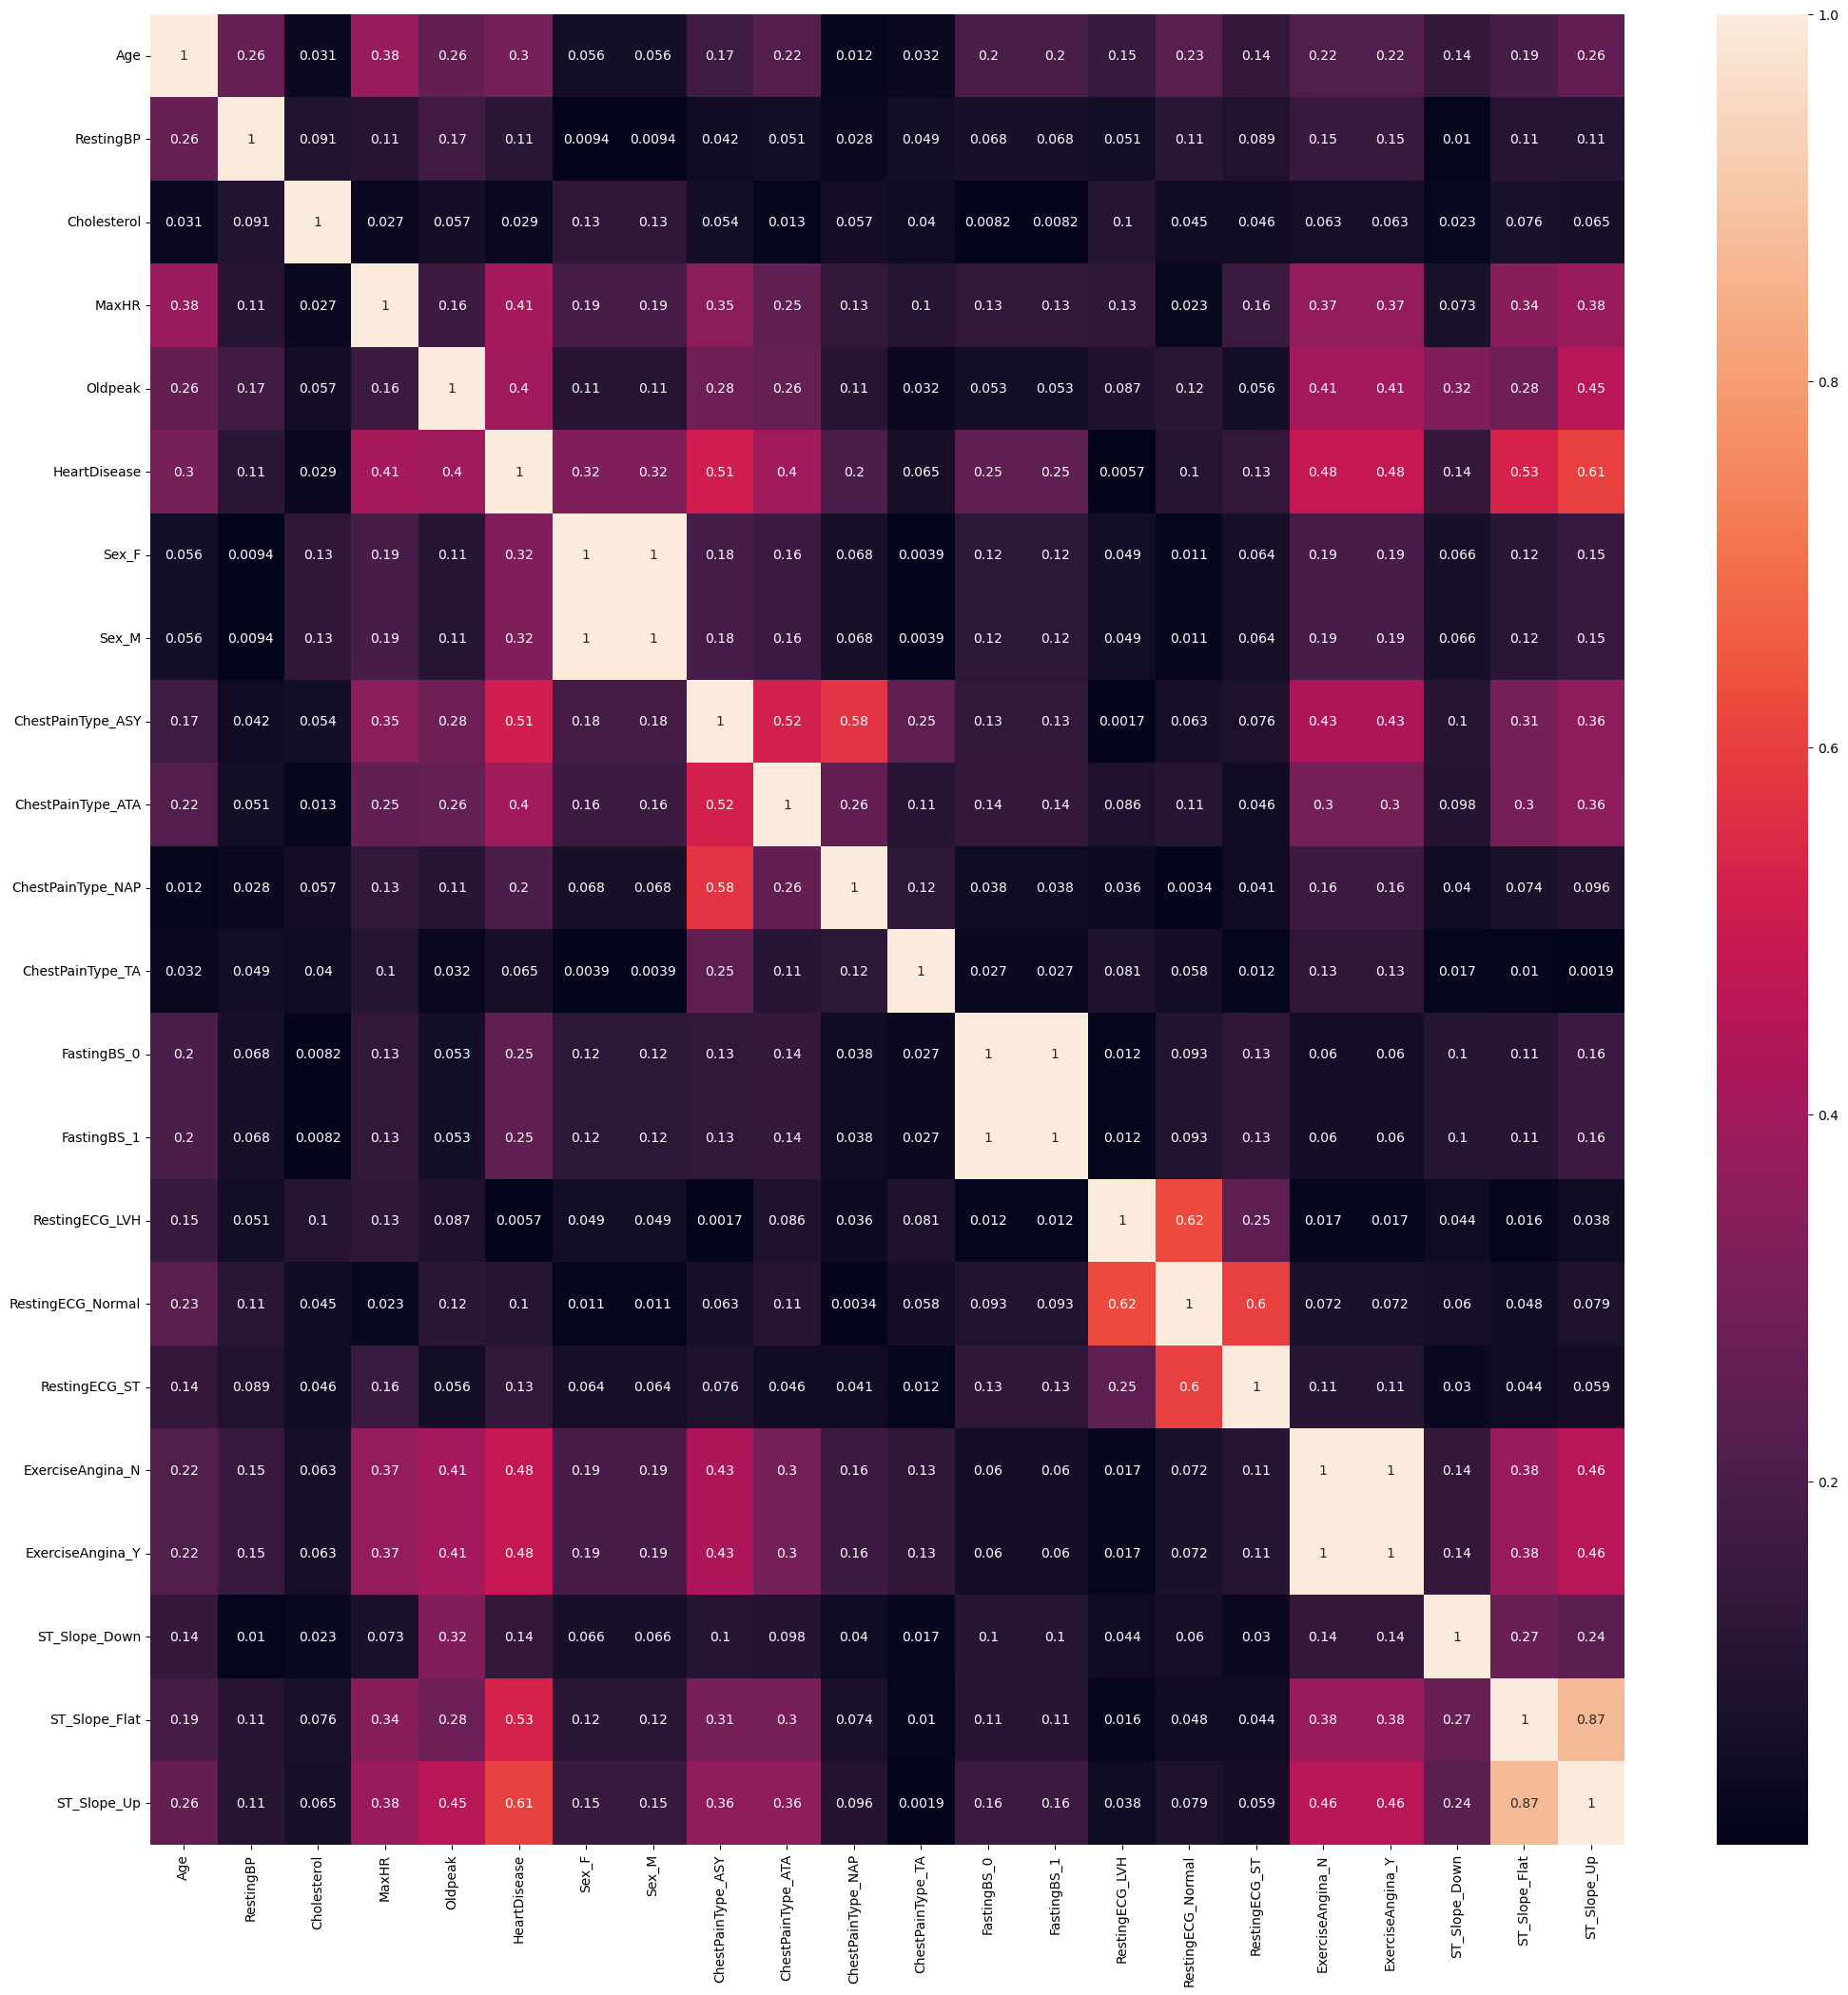

In [19]:
df=pd.get_dummies(data = df, columns = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope'])
correlations=df.corr(method='pearson').abs()
plt.figure(figsize=(25, 25))
heat_map=sns.heatmap(correlations,annot=True)


* From the above heatmap we can see the highest correlation with Heart Disease are with:<br>*Age <br>*MaxHr <br>*Oldpeak <br>*Sex_F <br>*Sex_M <br>*Chestpaintype_ASY <br>*ChestpainType_ATA <br>*Exerciseangina_N <br>*Exerciseangina_Y <br>*ST_Slope_Flat <br>*ST_Slope_UP

# Creating Training, Validation and Testing data sets #

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
X=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state = 417)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*X.shape[0]/X_train.shape[0], random_state = 417)


#### Selecting features with high correlation with heart disease for to building a KNearestNeigbour model

In [21]:
features=['Oldpeak','Sex_M','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up']
for i in features:
    knn=KNeighborsClassifier(n_neighbors=5,weights='distance',leaf_size=2)
    knn.fit(X_train[[i]],y_train)
    score=knn.score(X_val[[i]],y_val)
    print(f"feature: {i} and score:{score}")

feature: Oldpeak and score:0.7010869565217391
feature: Sex_M and score:0.6902173913043478
feature: ExerciseAngina_Y and score:0.6793478260869565
feature: ST_Slope_Flat and score:0.7717391304347826
feature: ST_Slope_Up and score:0.8097826086956522


#### Observation:
* The best performance for KNN model was with ST_Slope_up feature with 80,978% likelihood to predict heart disease correctly.

#### Scaling the selected above numerical features on training, validation and testing data sets

In [22]:
#Scaling the training, validation and testing data for the selected features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

knn=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(X_train_scaled,y_train)
score=knn.score(X_val_scaled,y_val)
print(f"score:{score}")


score:0.8097826086956522


* When training the model with the selected features of 'Oldpeak','Sex_M','ExerciseAngina_Y','ST_Slope_Flat' and 'ST_Slope_Up', the model accuracy is ~81%.

## Selecting parameters by using GridSearchCV

In [23]:
#Crete training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 417)

#scale the training set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

#Experimenting variables values for best model performance
hyper_dict={'n_neighbors': [3, 5, 7, 9],
         'weights': ['uniform', 'distance'],
         'leaf_size': [15, 20]}

knn=KNeighborsClassifier()
gscv=GridSearchCV(estimator=knn,param_grid=hyper_dict, scoring ='accuracy')
gscv.fit(X_train_scaled,y_train)
best_params=gscv.best_params_
best_score=gscv.best_score_

print(f"The best score is:{best_score:.3f} by using the following parameters {best_params}")

The best score is:0.831 by using the following parameters {'leaf_size': 15, 'n_neighbors': 5, 'weights': 'uniform'}


* By using n_neigbors value of 5, weights based on 'uniform' and leaf size 15 we are able to get up to 83% model accuracy.

#### Testing the built model

In [62]:
from sklearn.metrics import accuracy_score
#Scaling the test set

X_test_scaled = scaler.transform(X_test[features])
predictions=gscv.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
#knn=KNeighborsClassifier(best_estim)
#score=knn.score(X_test_scaled,y_test)
print(f"score:{accuracy}")

score:0.8369565217391305


### Findings

* The model reached ~84% accuracy by using the following features to train the KNearest Neighbour model: <br>* 'Oldpeak','Sex_M','ExerciseAngina_Y','ST_Slope_Flat' and 'ST_Slope_Up' <br>* And selected model parameters: 'leaf_size': 15, 'n_neighbors': 5, 'weights': 'uniform'} <br> * The model still has room for improvement on further accuracy on predicting a heart disease. <br>* One impacting factor is the unequal gender distribution in the patient data, as observed the majority are male patients and physiology is different between the genders. 